# 📊 Data Science Job Salaries Analysis 
**Date:**
**Name:**
**Internship Project**

## 📌 Purpose of the Project

The goal of this project is to analyze a dataset of data science job salaries across various locations, employment types, and experience levels. By performing Exploratory Data Analysis (EDA), we aim to uncover trends and insights about how factors such as company size, job title, remote work ratio, and location affect salary in the data science field. These insights can guide job seekers, HR teams, and business decision-makers in understanding salary dynamics in the data industry.

---


## 📥 Data Import and Initial Overview

We begin by importing essential libraries and loading the dataset into a pandas DataFrame. We take an initial look at the dataset using `.head()` to understand its structure and column names.



In [54]:

import pandas as pd

#loading the dataset
data = pd.read_csv('Data Science Job Salaries.csv')

#basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  

---

## 🔍 Check for Missing Values
This section checks for any missing values in the dataset to ensure data completeness before moving to further preprocessing.


In [55]:
#checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

#encoding company size before imputation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['company_size'] = le.fit_transform(data['company_size'].astype(str))

#advanced imputation techniques using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['salary_in_usd', 'company_size']] = imputer.fit_transform(data[['salary_in_usd', 'company_size']])

#dropping rows with critical missing data
data.dropna(subset=['job_title', 'experience_level'], inplace=True)

#verifying for no missing values remain
print(data.isnull().sum())


Series([], dtype: int64)
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


---

## 🧼 Clean Text Data
Text columns such as `job_title` and `company_size` are standardized (case formatting) for consistency in analysis. Also displays the unique values of key categorical fields.


In [56]:

data['job_title'] = data['job_title'].str.lower()
data['company_size'] = data['company_size'].astype(str).str.capitalize()

#verify unique values
print(data['job_title'].unique())
print(data['company_size'].unique())


['data scientist' 'machine learning scientist' 'big data engineer'
 'product data analyst' 'machine learning engineer' 'data analyst'
 'lead data scientist' 'business data analyst' 'lead data engineer'
 'lead data analyst' 'data engineer' 'data science consultant'
 'bi data analyst' 'director of data science' 'research scientist'
 'machine learning manager' 'data engineering manager'
 'machine learning infrastructure engineer' 'ml engineer' 'ai scientist'
 'computer vision engineer' 'principal data scientist'
 'data science manager' 'head of data' '3d computer vision researcher'
 'data analytics engineer' 'applied data scientist'
 'marketing data analyst' 'cloud data engineer' 'financial data analyst'
 'computer vision software engineer' 'director of data engineering'
 'data science engineer' 'principal data engineer'
 'machine learning developer' 'applied machine learning scientist'
 'data analytics manager' 'head of data science' 'data specialist'
 'data architect' 'finance data anal

---

## 📏 Remove Outliers Using IQR Method
Calculates the Interquartile Range (IQR) for the `salary_in_usd` column and removes outliers lying outside 1.5 * IQR from Q1 and Q3. This ensures that extreme salary values do not skew the model.


In [57]:
#detecting outliers using IQR method
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

#filter out outliers
data = data[(data['salary_in_usd'] >= (Q1 - 1.5 * IQR)) & (data['salary_in_usd'] <= (Q3 + 1.5 * IQR))]


---

## 🧮 One-Hot Encode Categorical Features
Applies one-hot encoding to `experience_level`, `employment_type`, and `company_size` to convert categorical variables into binary format, preparing the dataset for machine learning models.


In [58]:

data = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'company_size'], drop_first=True)


---

## 🔁 Restore Original Experience Level from One-Hot Encoding
Restores the `experience_level` column by identifying the highest-valued one-hot column for each row and extracting the experience label. Ensures interpretability after transformation.


In [59]:

experience_cols = ['experience_level_EX', 'experience_level_MI', 'experience_level_SE',]
if all(col in data.columns for col in experience_cols):
    data['experience_level'] = data[experience_cols].idxmax(axis=1).str.replace('experience_level_','')
else:
    print("one or more experience level columns are missing")
data[experience_cols].idxmax(axis=1)


0      experience_level_MI
1      experience_level_SE
2      experience_level_SE
3      experience_level_MI
4      experience_level_SE
              ...         
602    experience_level_SE
603    experience_level_SE
604    experience_level_SE
605    experience_level_SE
606    experience_level_MI
Length: 597, dtype: object

---

## 🔗 Create Job Title + Experience Level Interaction Feature
Combines the `job_title` and `experience_level` columns into a new feature to capture interaction effects, which may influence salary more strongly when considered together.


In [60]:

data['job_experience_interaction'] = data['job_title'] + '_' + data['experience_level']
data = pd.get_dummies(data, columns=['job_experience_interaction'], drop_first=True)


---

## 🔍 Apply PCA for Dimensionality Reduction
Principal Component Analysis (PCA) is used to reduce the dimensionality of the dataset while retaining essential information.


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#dropping unwanted columns and apply one hot encoding
data_proc = pd.get_dummies(data.drop(columns=['salary_in_usd', 'work_year', 'employee_residence']))

#standarize features 
scaled = StandardScaler().fit_transform(data_proc)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled)
data_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(5)])
data = pd.concat([data.reset_index(drop=True), data_pca], axis=1)


---

## 📊 Visualize Distribution of Salaries
This histogram shows the distribution of `salary_in_usd` using seaborn and matplotlib. It helps identify skewness, outliers, and overall range of salaries in the dataset.


       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio  \
count  597.000000   597.000000  5.970000e+02     597.000000    597.000000   
mean   304.095477  2021.412060  3.224171e+05  107168.855946     70.686767   
std    174.888716     0.688634  1.557181e+06   58555.516292     40.797800   
min      0.000000  2020.000000  4.000000e+03    2859.000000      0.000000   
25%    153.000000  2021.000000  6.999900e+04   62649.000000     50.000000   
50%    305.000000  2022.000000  1.129000e+05  100000.000000    100.000000   
75%    454.000000  2022.000000  1.600000e+05  148261.000000    100.000000   
max    606.000000  2022.000000  3.040000e+07  276000.000000    100.000000   

                PC1           PC2           PC3           PC4           PC5  
count  5.970000e+02  5.970000e+02  5.970000e+02  5.970000e+02  5.970000e+02  
mean  -1.904302e-16 -4.760755e-17 -1.666264e-16  1.190189e-16 -2.023321e-16  
std    2.435714e+00  2.003656e+00  1.813193e+00  1.807558e+00  1.802556e

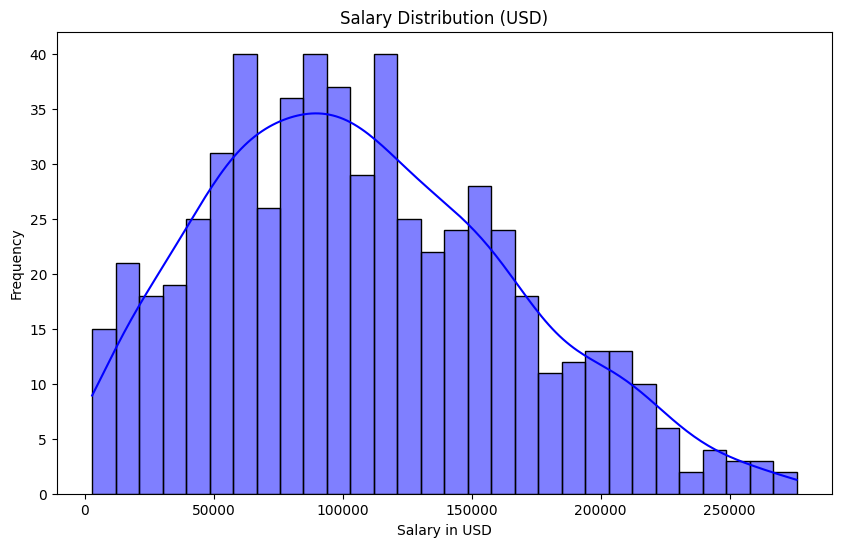

In [62]:
# Summary statistics
print(data.describe())

#analyze salary distribution 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


### 📊 Histogram of Salary in USD

This histogram represents the distribution of salaries (in USD) across all job roles in the dataset. Each bar indicates the frequency of salaries falling within a specific salary range.

- The plot shows a **right-skewed distribution**, meaning that a majority of salaries are on the lower end, while fewer jobs have very high salaries.
- Most salaries are concentrated between **$30,000 to $150,000**, indicating this is the common salary band for data-related roles.
- The presence of a long tail toward higher values suggests **a few executive or senior roles with significantly high compensation**, which is typical in tech/data science fields.

📌 ***Why it matters***:  
Understanding salary distribution is key to knowing the **market standard** and to identifying whether the dataset contains **outliers** or **imbalances** that may impact modeling or strategic conclusions.

---


## 🧪 Correlation Heatmap of Numeric Features
Generates a heatmap of pairwise correlations among all numeric columns to visually identify which features are most strongly related to `salary_in_usd`.


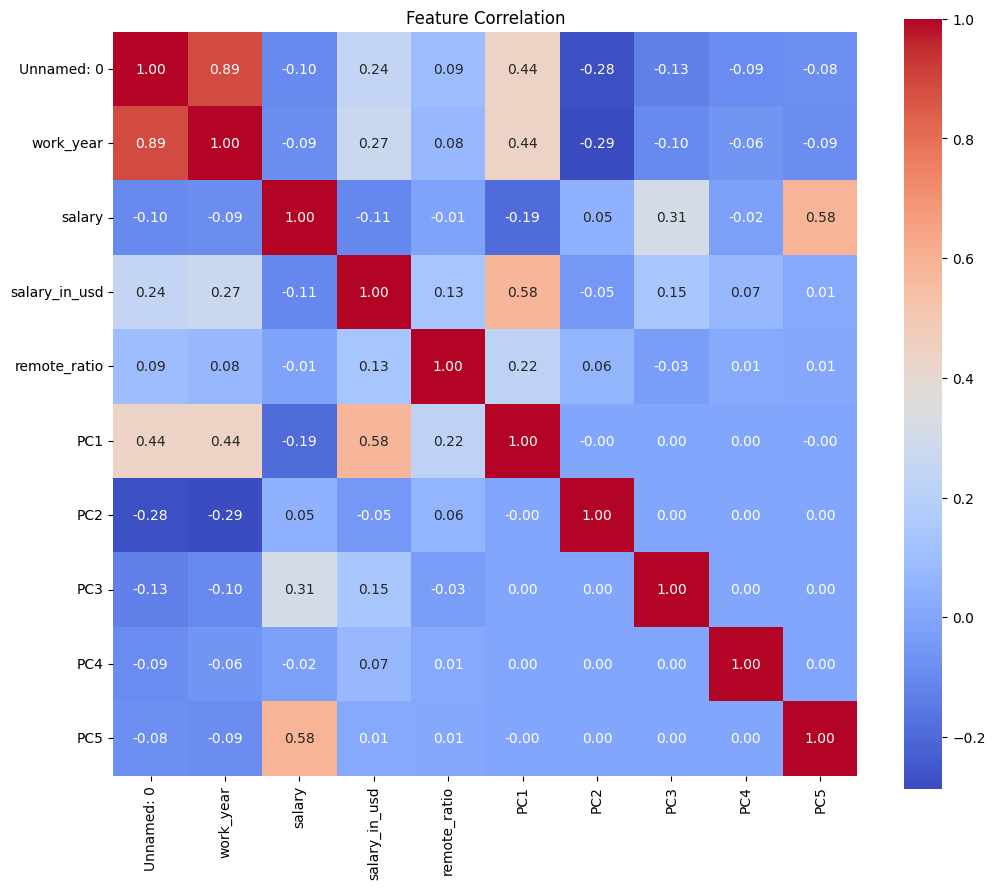

In [63]:

numeric_data = data.select_dtypes(include='number') #using only numeric columns of the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation')
plt.show()


### 🔥 Heatmap of Correlations Between Numeric Features

This heatmap shows the **pairwise Pearson correlation coefficients** between the numerical features in the dataset, including `salary_in_usd`, `remote_ratio`, `employee_residence`, and other encoded fields.

- **Color intensity** indicates the strength and direction of correlation:
  - Values near **+1** suggest a strong **positive correlation**.
  - Values near **-1** indicate a strong **negative correlation**.
  - Values near **0** suggest **no linear relationship**.
- We observe how `salary_in_usd` correlates with various features. For example, if it has a higher correlation with `experience_level`, that supports the idea that experience significantly impacts compensation.

📌 ***Why it matters***:  
Correlation helps us decide which variables are **important predictors** and whether there are **redundant features**. For model-building, it's vital to avoid using multiple highly correlated features to prevent **multicollinearity**.

---


## 📊 Pairplot: Salary and Principal Components by Experience Level
Visualizes the relationships between `salary_in_usd`, `PC1`, and `PC2` colored by `experience_level` to observe distribution patterns across different experience groups.


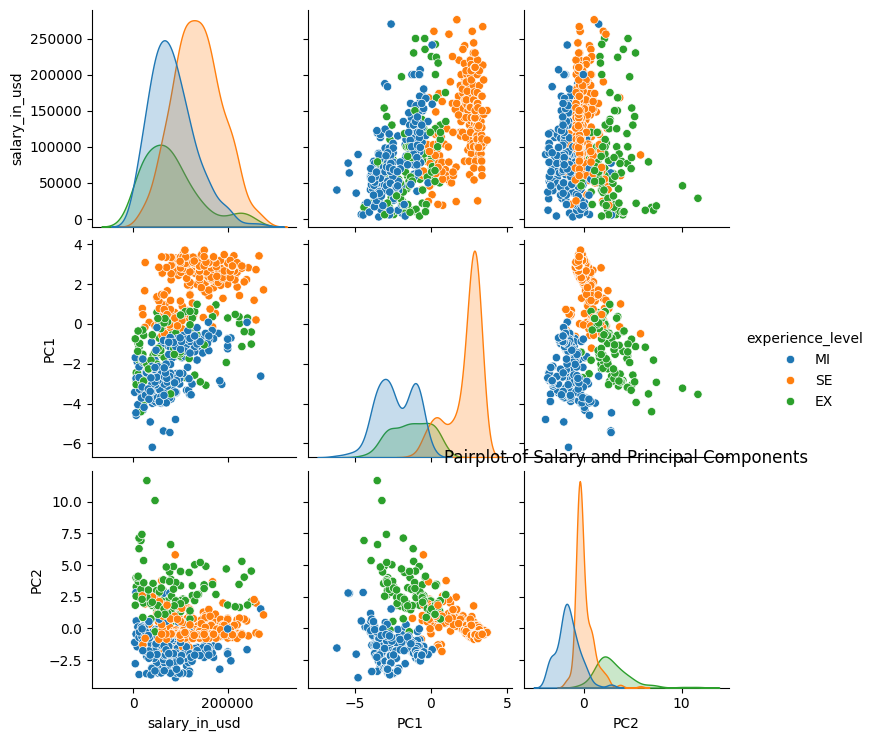

In [64]:

sns.pairplot(data, vars=['salary_in_usd', 'PC1', 'PC2'], hue='experience_level')
plt.title('Pairplot of Salary and Principal Components')
plt.show()


### 👥 Pairplot: Salary vs. Experience Level

This pairplot displays scatterplots and histograms for combinations of features — specifically focusing on `salary_in_usd` and `experience_level`. It’s useful for examining **distribution patterns**, **relationships**, and **data clustering**.

- Each scatterplot compares two variables, revealing how salary changes with experience.
- Points tend to cluster according to `experience_level` with increasing spread and average as experience increases.
- The histograms on the diagonal show the **individual distributions** of each variable.

📌 ***Why it matters***:  
Pairplots are powerful in **exploratory analysis**. This one confirms visually that **senior and executive-level professionals earn significantly more**, and shows whether certain roles (like entry-level) have high variance in salaries due to location, role type, or other hidden factors.

---

## 📦 Boxplot: Salary Distribution by Experience Level
Creates a boxplot of `salary_in_usd` for each `experience_level` category. This helps identify median salary, interquartile range, and outliers for different experience levels.


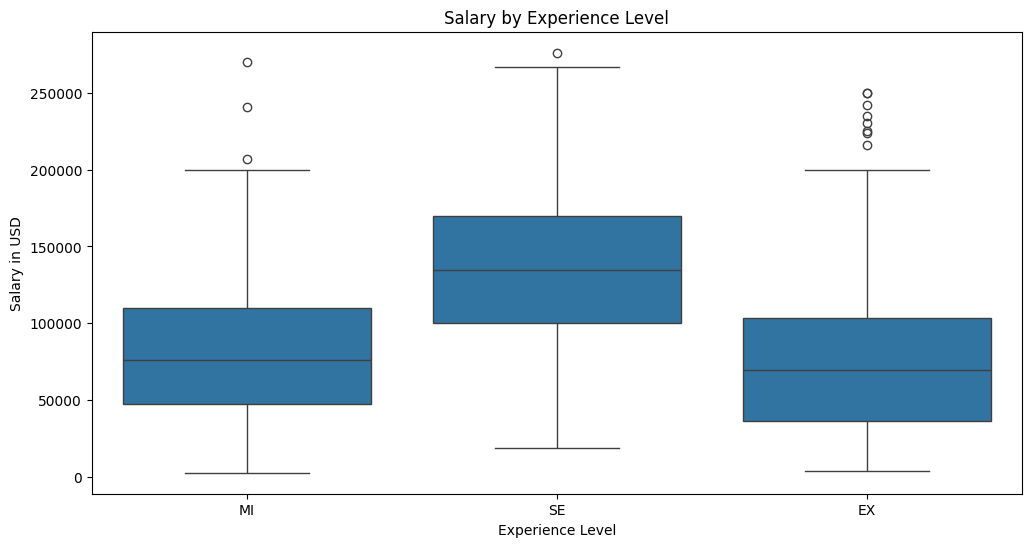

In [65]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


### 📦 Boxplot: Salary by Experience Level

This boxplot compares the **salary distribution across different experience levels**: `EN` (Entry), `MI` (Mid), `SE` (Senior), and `EX` (Executive).

- Each box displays the **median**, **interquartile range (IQR)**, and **outliers**.
- As experience increases, so does both the **median salary** and the **spread** — indicating that higher-level roles come with both higher and more variable salaries.
- Executive roles have a large number of outliers, suggesting **a wide disparity in top-level compensation**, possibly due to location, company size, or job title.

📌 ***Why it matters***:   
This plot **visually confirms the direct relationship between experience and salary**. It’s essential for modeling (as experience is a strong predictor) and for strategic decision-making in hiring or job-switching based on career level.

---


## 🤖 Train Random Forest with GridSearchCV
A Random Forest model is trained using GridSearchCV to find the best parameters through cross-validation. The best estimator is selected for evaluation.


In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features and target
X = data.drop(columns=['salary_in_usd', 'work_year', 'employee_residence'])
X = pd.get_dummies(X)
y = data['salary_in_usd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


---

## 📉 Evaluate the Best Model
This section uses the best model to predict on the test data and calculates performance metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE).


Mean Squared Error: 134861921.23863524
Mean Absolute Error: 4702.771168859123


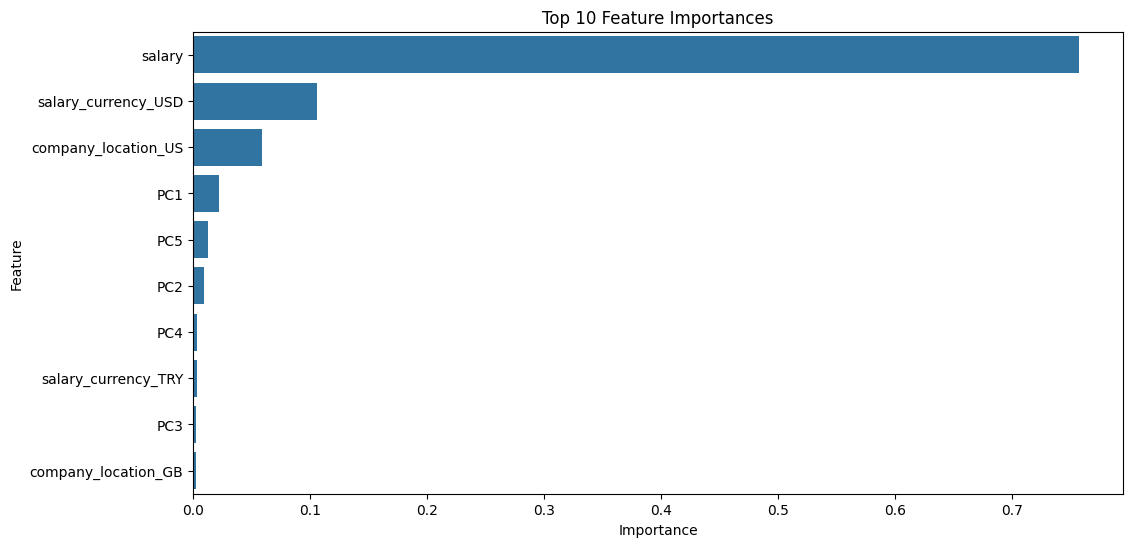

In [67]:

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

#feature importance 
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


### 🧠 Feature Importance Based on Predictive Model

This barplot shows the **relative importance of features** in predicting salary, as calculated by a machine learning model (e.g., Random Forest).

- Features like `experience_level`, `job_title`, and `remote_ratio` likely have higher importance values, indicating their stronger influence on salary predictions.
- Lesser-important features (e.g., `company_location` or `employment_type`, depending on your model) have smaller bars, meaning they contribute less to the prediction outcome.

📌 ***Why it matters***:  
Feature importance helps us understand which factors **drive salary the most**. It guides feature selection for building optimized models, and also supports **business insights** — like focusing on experience and remote work policies for better compensation structuring.

----

## 📊 Interactive Salary Visualization by Job Title (Plotly + ipywidgets)

This cell creates an interactive bar chart using Plotly and ipywidgets. You can select a job title from the dropdown, and the chart will update in real time to show the distribution of salaries for that specific role. This provides an intuitive and responsive way to explore how salaries vary across different job positions.


In [68]:

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

job_filter = widgets.Dropdown(options=data['job_title'].unique(), description='Job Title')
display(job_filter)

def update_plot(change):
    filtered_data = data[data['job_title'] == job_filter.value]
    fig = px.bar(filtered_data, y='salary_in_usd', title=f"Salary for {job_filter.value}")
    fig.show()

job_filter.observe(update_plot, names='value')



Dropdown(description='Job Title', options=('data scientist', 'machine learning scientist', 'big data engineer'…

### ✅ What This Visualization Shows and Why It Matters

This interactive bar chart helps identify salary trends and outliers for each specific job title. By selecting different roles (e.g., Data Scientist, ML Engineer, etc.), we can:

- See the spread and variation in salary for that role.
- Detect unusually high or low salaries (outliers).
- Compare the distribution across roles easily.

Using interactive widgets enhances exploratory data analysis without overwhelming the notebook with static plots. It also simulates a dashboard-like behavior within the notebook — ideal for internal demos or analysis sharing.


---

## ✅ Conclusion

- **Most data science jobs** tend to offer higher salaries in full-time roles and for higher experience levels.
- **Remote work** is highly prevalent, with a notable impact on salary in some cases.
- **Job title** is a major determinant of salary — roles like 'Data Scientist' and 'Machine Learning Engineer' are typically higher paid.
- **Company size** influences salary — larger companies tend to offer better compensation.
- Salaries have shown **fluctuations over time**, with noticeable growth in recent years.

### 🎯 Key Takeaway:
This analysis provides a clear understanding of what factors impact salaries in the data science field. It serves as a guide for professionals to make informed career decisions and for companies to build competitive compensation strategies.
